In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [37]:
def visualize_multiple_images(image_dir, mask_dir, num_visualizations=5):
    """
    Visualiza varias imágenes y sus máscaras con las regiones coloreadas y traslúcidas.

    Args:
        image_dir (str): Directorio que contiene las imágenes originales.
        mask_dir (str): Directorio que contiene las máscaras generadas.
        num_visualizations (int): Número de imágenes a visualizar.
    """
    # Obtener lista de imágenes y máscaras
    images = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])
    masks = sorted([f for f in os.listdir(mask_dir) if f.endswith("_mask.png")])

    # Asegurarse de que hay suficientes imágenes y máscaras
    num_examples = min(num_visualizations, len(images), len(masks))
    if num_examples == 0:
        print("No se encontraron imágenes o máscaras en los directorios proporcionados.")
        return

    # Seleccionar aleatoriamente las imágenes y máscaras
    selected_indices = random.sample(range(len(images)), num_examples)
    selected_examples = [(images[i], masks[i]) for i in selected_indices]

    # Crear subplots
    fig, axes = plt.subplots(num_examples, 2, figsize=(12, 6 * num_examples))

    if num_examples == 1:  # Ajustar ejes si hay solo una imagen
        axes = np.array([axes])

    for idx, (image_name, mask_name) in enumerate(selected_examples):
        # Leer la imagen y la máscara
        image_path = os.path.join(image_dir, image_name)
        mask_path = os.path.join(mask_dir, mask_name)
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            print(f"Error al cargar {image_name} o {mask_name}")
            continue

        # Crear una copia para colorear
        overlay = image.copy()

        # Resaltar las regiones con colores traslúcidos
        regions_colors = {
            2: (0, 255, 255),  # Clase 2: Surco, amarillo
            3: (255, 0, 255),  # Clase 3: Segmento IV, magenta
        }

        for label, color in regions_colors.items():
            region_mask = (mask == label).astype(np.uint8) * 255
            contours, _ = cv2.findContours(region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(overlay, contours, -1, color, thickness=cv2.FILLED)

        # Añadir transparencia a las regiones coloreadas
        overlay = cv2.addWeighted(overlay, 0.3, image, 0.7, 0)

        # Extraer los centroides de las clases (2: surco, 3: segmento 4)
        centroids = {}
        for label in [2, 3]:
            y_coords, x_coords = np.where(mask == label)
            if len(x_coords) > 0 and len(y_coords) > 0:
                cx = int(np.mean(x_coords))
                cy = int(np.mean(y_coords))
                centroids[label] = (cx, cy)

        # Verificar que se encontraron los centroides necesarios
        if 2 in centroids and 3 in centroids:
            cx1, cy1 = centroids[2]  # Surco
            cx2, cy2 = centroids[3]  # Segmento 4

            # Dibujar la línea recta entre surco y segmento 4 con mayor grosor y transparencia
            cv2.line(overlay, (cx1, cy1), (cx2, cy2), (0, 255, 0), 3, cv2.LINE_AA)

        # Mostrar imagen original
        axes[idx, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f"Imagen Original: {image_name}")
        axes[idx, 0].axis("off")

        # Mostrar imagen con regiones coloreadas
        axes[idx, 1].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[idx, 1].set_title(f"Imagen con Máscara: {mask_name}")
        axes[idx, 1].axis("off")

    plt.tight_layout()
    plt.show()




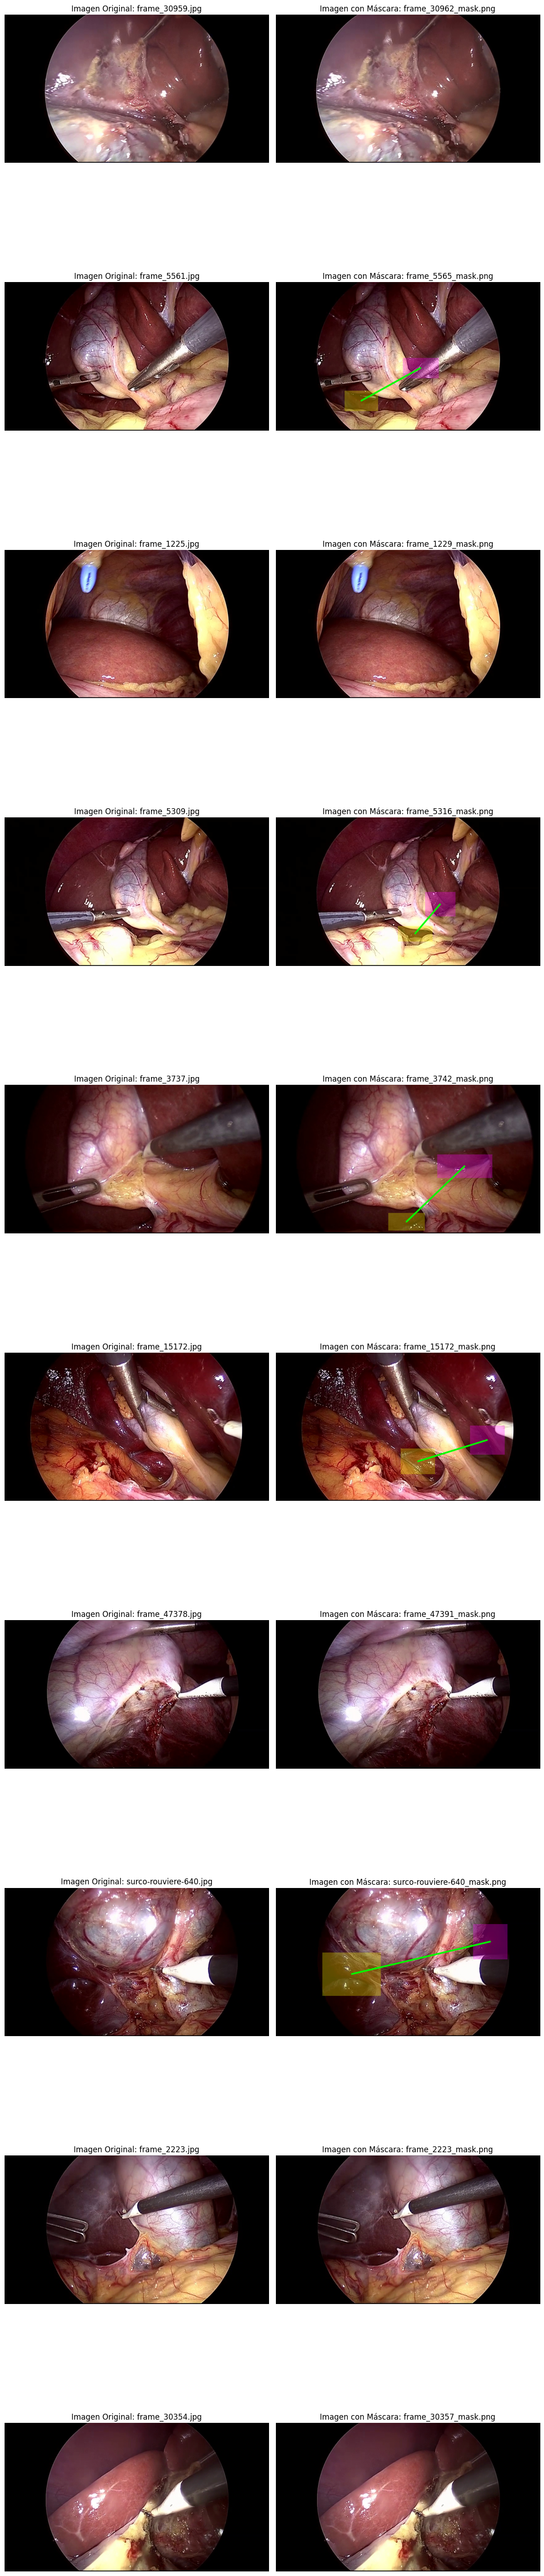

In [42]:
# Uso del método
image_dir = "train"
mask_dir = "masks/train"
visualize_multiple_images(image_dir, mask_dir, num_visualizations=10)

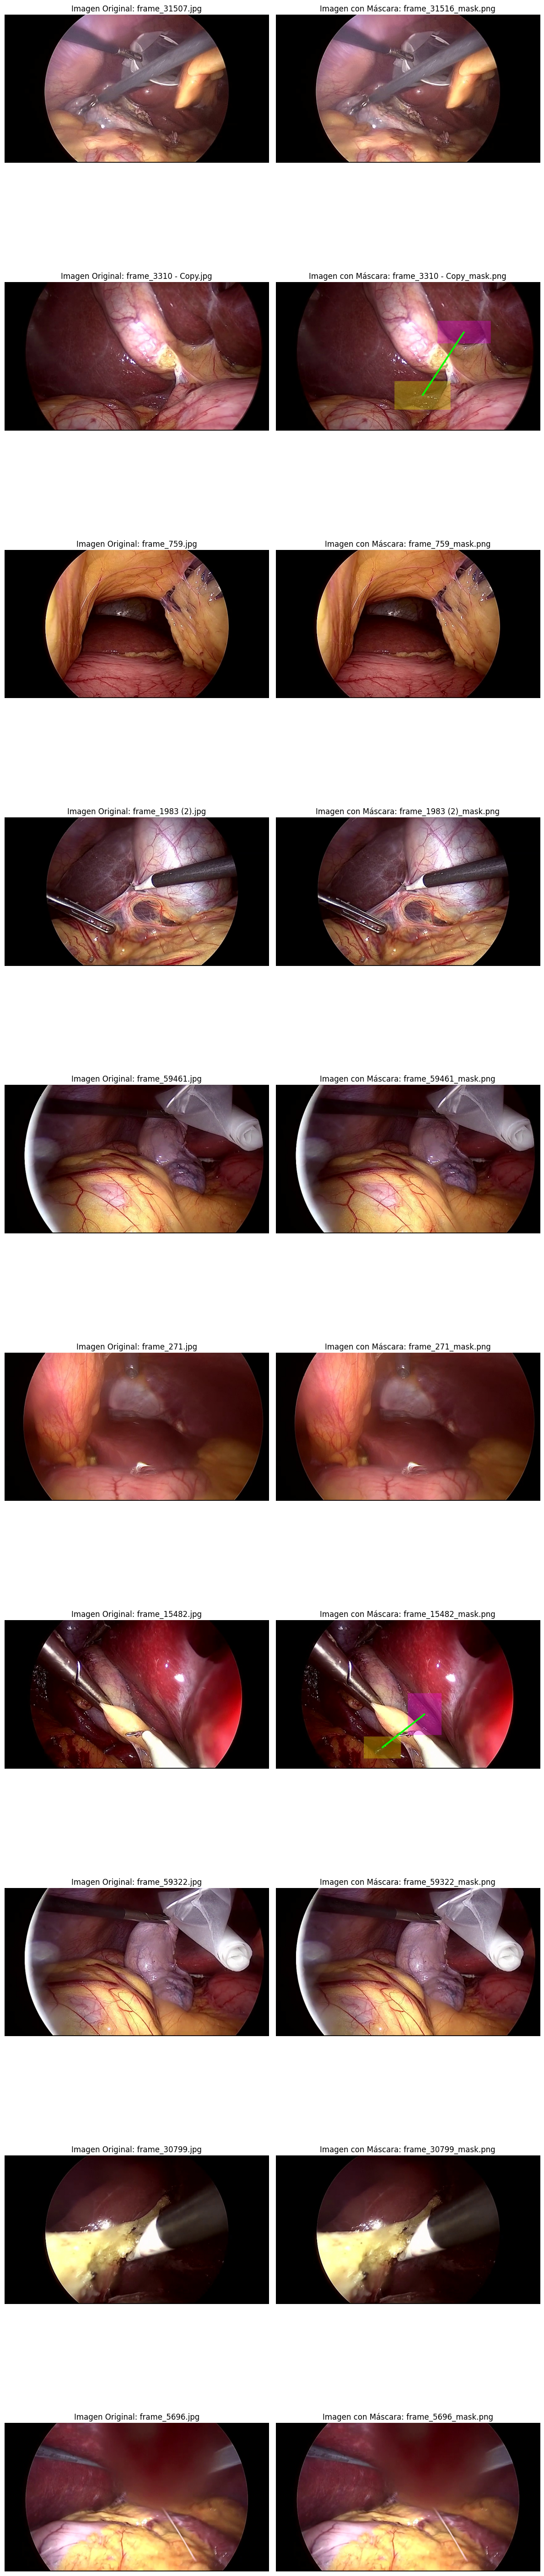

In [43]:

image_dir = "val"
mask_dir = "masks/val"
visualize_multiple_images(image_dir, mask_dir, num_visualizations=10)